In [11]:
library(tidyverse)

── Attaching packages ────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.8     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.1
✔ readr   2.1.2     ✔ forcats 0.5.2
── Conflicts ───────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


### Analysis of variance (ANOVA)

* A statistical technique to analyze variation in a response variable (continuous random variable) measured under conditions defined by discrete factors

* Concerned with the differences in means.

 * Sort of generalization of the t-test to multiple samples

 

* A widely used statistical test 

* ANOVA is also used to assess the significance of coffecient in a linear regression. This will be covered separately.

In [3]:
load("data/clinicaltrial.Rdata")
clin.trial

drug,therapy,mood.gain
<fct>,<fct>,<dbl>
placebo,no.therapy,0.5
placebo,no.therapy,0.3
placebo,no.therapy,0.1
anxifree,no.therapy,0.6
anxifree,no.therapy,0.4
anxifree,no.therapy,0.2
joyzepam,no.therapy,1.4
joyzepam,no.therapy,1.7
joyzepam,no.therapy,1.3


In [4]:
xtabs( ~drug, clin.trial)

drug
 placebo anxifree joyzepam 
       6        6        6 

In [6]:
aggregate( mood.gain ~ drug, clin.trial, mean)

drug,mood.gain
<fct>,<dbl>
placebo,0.4500000
anxifree,0.7166667
joyzepam,1.4833333


In [7]:
aggregate(mood.gain ~ drug, clin.trial, sd)

drug,mood.gain
<fct>,<dbl>
placebo,0.2810694
anxifree,0.3920034
joyzepam,0.2136976


### Formulating the Question

* The experimenter is interested in comparing the average change for more than two classes
  * Here compere the mean mood change across three different groups


* t-test (Chapter 13), but involving more than two groups. 

$\mu_p$ for placebo, and let $\mu_A$ Anxifree and $\mu_j$ Joyzepam

Null hypothesis: all means are identical
 * That is, neither of the two drugs is any more effective than a placebo. 

* $H_0 : \mu_P = \mu_A = \mu_J$

* $H_a: \mu_P \ne \mu_A or \mu_P \ne \mu_J or \mu_P \ne \mu_a$



* Suppose G refers to the number of groups tested
* $N$: total sample size
* $N_k$ people in the kth group
* $Y_{ik}$, mood change for ith member of the kth group



* Variance is computed as:

$$
\mbox{Var}(Y) = \frac{1}{N} \sum_{k=1}^G \sum_{i=1}^{N_k} \left(Y_{ik} - \bar{Y} \right)^2
$$

### ANOVA  hypothesis
* In the null, the between variance is small (or 0) 
  * Total variance is equal to variance within 

![](https://www.dropbox.com/s/2opvff2zro8fs50/variance.png?dl=1)

### Total Sum of Squares and the Within Sum of Squares

$$
\mbox{SS}_{tot} = \sum_{k=1}^G \sum_{i=1}^{N_k} \left(Y_{ik} - \bar{Y} \right)^2
$$ 

$$
\mbox{SS}_w = \sum_{k=1}^G \sum_{i=1}^{N_k} \left( Y_{ik} - \bar{Y}_k \right)^2
$$

* We expect $SS_w$ to be smaller than the SS_{tot} because it’s completely ignoring any between-group differences. 

 

  * I.e., the fact that the drugs (if they work) will have different effects on people’s moods.



### The Between Sum of Squares

$$
\begin{array}{rcl}
\mbox{SS}_{b} &=& \sum_{k=1}^G \sum_{i=1}^{N_k} \left( \bar{Y}_k - \bar{Y} \right)^2
 \\
&=& \sum_{k=1}^G N_k \left( \bar{Y}_k - \bar{Y} \right)^2
\end{array}
$$



### The Test Statistic

* The idea behind ANOVA is to compare the two sums of squares values $SS_b$ and $SS_w$ to each other: 
   * If the between-group variation is $SS_b$ is large relative to the within-group variation $SS_w$ then we have reason to suspect that the population means for the different groups aren’t identical to each other.
   
* Compute the $F$ ratio
$$
F = \frac{\mbox{MS}_b }{ \mbox{MS}_w } 
$$
Where

$$
\begin{array}{lcl}
\mbox{MS}_b &=& \displaystyle\frac{\mbox{SS}_b }{ \mbox{df}_b} \\
\mbox{MS}_w &=& \displaystyle\frac{\mbox{SS}_w }{ \mbox{df}_w} 
\end{array}
$$

$$
\begin{array}{lcl}
\mbox{df}_b &=& G-1 \\
\mbox{df}_w &=& N-G \\
\end{array}
$$






### The Test Statistic

* Bigger values of F mean that the between-group variation is large, relative to the within-group variation. 
  * Larger the value of F, the more evidence we have against the null hypothesis

* How large does F have to be in order to actually reject H0? 

* The sampling distribution for the F statistic under the null hypothesis is an F distribution.

### The F-Distribution

* Looks a bit like a $\chi^2$ distribution
 * Arises whenever you need to compare two \chi^2 distributions to one another
 * Example computing the ratio of two $\chi^2$ quantities
* Recall that the \chi^2 is the key distribution when we’re taking a “sum of squares”
   * Thus if we want to compare the “sums of squares” of two distributions then we need the F-distribution



In [12]:
df_b = 3 
df_w = 6
x_axis = seq(0, 10, 0.05)
x_axis

[1]  0.00  0.05  0.10  0.15  0.20  0.25  0.30  0.35  0.40  0.45  0.50  0.55
 [13]  0.60  0.65  0.70  0.75  0.80  0.85  0.90  0.95  1.00  1.05  1.10  1.15
 [25]  1.20  1.25  1.30  1.35  1.40  1.45  1.50  1.55  1.60  1.65  1.70  1.75
 [37]  1.80  1.85  1.90  1.95  2.00  2.05  2.10  2.15  2.20  2.25  2.30  2.35
 [49]  2.40  2.45  2.50  2.55  2.60  2.65  2.70  2.75  2.80  2.85  2.90  2.95
 [61]  3.00  3.05  3.10  3.15  3.20  3.25  3.30  3.35  3.40  3.45  3.50  3.55
 [73]  3.60  3.65  3.70  3.75  3.80  3.85  3.90  3.95  4.00  4.05  4.10  4.15
 [85]  4.20  4.25  4.30  4.35  4.40  4.45  4.50  4.55  4.60  4.65  4.70  4.75
 [97]  4.80  4.85  4.90  4.95  5.00  5.05  5.10  5.15  5.20  5.25  5.30  5.35
[109]  5.40  5.45  5.50  5.55  5.60  5.65  5.70  5.75  5.80  5.85  5.90  5.95
[121]  6.00  6.05  6.10  6.15  6.20  6.25  6.30  6.35  6.40  6.45  6.50  6.55
[133]  6.60  6.65  6.70  6.75  6.80  6.85  6.90  6.95  7.00  7.05  7.10  7.15
[145]  7.20  7.25  7.30  7.35  7.40  7.45  7.50  7.55  7.60  7.65  7.70  7.75
[157]  7.80  7.85  7.90  7.95  8.00  8.05  8.10  8.15  8.20  8.25  8.30  8.35
[169]  8.40  8.45  8.50  8.55  8.60  8.65  8.70  8.75  8.80  8.85  8.90  8.95
[181]  9.00  9.05  9.10  9.15  9.20  9.25  9.30  9.35  9.40  9.45  9.50  9.55
[193]  9.60  9.65  9.70  9.75  9.80  9.85  9.90  9.95 10.00

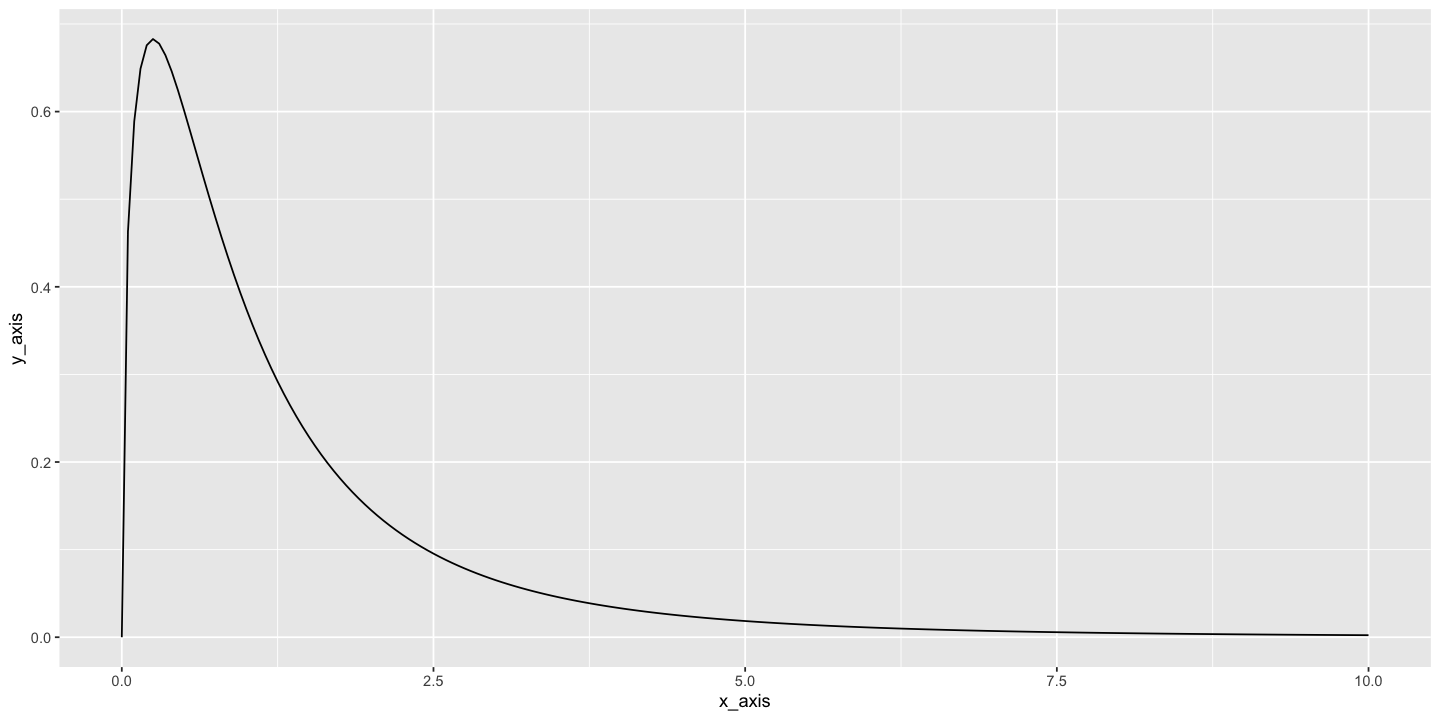

In [13]:
options(repr.plot.width=12, repr.plot.height=6)
y_axis = df(x_axis, df_b, df_w)
ggplot() + 
  geom_line(aes(x_axis, y_axis))


### The Model for the Data: an FYI

For the null hypothesis, the assumption is:

$$
Y_{ik} = \mu + \epsilon_{ik}
$$ 

where, 
$
\epsilon_{ik} \sim \mbox{Normal}(0, \sigma^2)
$$

Where as for the alternative, the assumption is: 
$$
Y_{ik} = \mu_k + \epsilon_{ik}
$$


### The model for the Data - Cont'd

The $MS_w$ and $MS_b$ as estimators of the variances


The $MS_w$ is an estimate of the residual variance $\sigma^2$
  * So it is $\chi^2$ distributed
  
The $MS_b$ is an estimator of the residuals variance plus a quantity that depends on the true differences among the group means.
  * So it is $\chi^2$ distributed

Thus, the ratio of two $\chi^2$ distributed quantities follows and F-distribution







In [14]:
### For the practice

temp_data = tibble(clin.trial[, c(1,3)])
head(temp_data)



drug,mood.gain
<fct>,<dbl>
placebo,0.5
placebo,0.3
placebo,0.1
anxifree,0.6
anxifree,0.4
anxifree,0.2


In [19]:
temp_data %>% 
  group_by(drug) %>% 
  summarise_at(vars(mood.gain), list(group_mean = mean))

drug,group_mean
<fct>,<dbl>
placebo,0.4500000
anxifree,0.7166667
joyzepam,1.4833333


In [20]:
temp_data %>% 
  group_by(drug) %>% 
  summarise_at(vars(mood.gain), list(group_mean = mean))

drug,group_mean
<fct>,<dbl>
placebo,0.4500000
anxifree,0.7166667
joyzepam,1.4833333


In [24]:
head(temp_data)

drug,mood.gain
<fct>,<dbl>
placebo,0.5
placebo,0.3
placebo,0.1
anxifree,0.6
anxifree,0.4
anxifree,0.2


In [25]:
temp_data %>% 
  group_by(drug) %>% 
  mutate(group_mean = mean(mood.gain))


drug,mood.gain,group_mean
<fct>,<dbl>,<dbl>
placebo,0.5,0.4500000
placebo,0.3,0.4500000
placebo,0.1,0.4500000
anxifree,0.6,0.7166667
anxifree,0.4,0.7166667
anxifree,0.2,0.7166667
joyzepam,1.4,1.4833333
joyzepam,1.7,1.4833333
joyzepam,1.3,1.4833333


In [27]:
temp_data_2 = temp_data %>% 
  group_by(drug) %>% 
  mutate(group_mean = mean(mood.gain))
temp_data_2

drug,mood.gain,group_mean
<fct>,<dbl>,<dbl>
placebo,0.5,0.4500000
placebo,0.3,0.4500000
placebo,0.1,0.4500000
anxifree,0.6,0.7166667
anxifree,0.4,0.7166667
anxifree,0.2,0.7166667
joyzepam,1.4,1.4833333
joyzepam,1.7,1.4833333
joyzepam,1.3,1.4833333


In [30]:
temp_data_3 = temp_data_2 %>%
   mutate(dev_from_mean = mood.gain - group_mean)
temp_data_3

drug,mood.gain,group_mean,dev_from_mean
<fct>,<dbl>,<dbl>,<dbl>
placebo,0.5,0.4500000,0.05000000
placebo,0.3,0.4500000,-0.15000000
placebo,0.1,0.4500000,-0.35000000
anxifree,0.6,0.7166667,-0.11666667
anxifree,0.4,0.7166667,-0.31666667
anxifree,0.2,0.7166667,-0.51666667
joyzepam,1.4,1.4833333,-0.08333333
joyzepam,1.7,1.4833333,0.21666667
joyzepam,1.3,1.4833333,-0.18333333


In [31]:
options(digits=4)
temp_data_4 = temp_data_3 %>%
  mutate(sq_dev_from_mean = dev_from_mean **2)
head(temp_data_4, digits = 2)

drug,mood.gain,group_mean,dev_from_mean,sq_dev_from_mean
<fct>,<dbl>,<dbl>,<dbl>,<dbl>
placebo,0.5,0.4500,0.0500,0.00250
placebo,0.3,0.4500,-0.1500,0.02250
placebo,0.1,0.4500,-0.3500,0.12250
anxifree,0.6,0.7167,-0.1167,0.01361
anxifree,0.4,0.7167,-0.3167,0.10028
anxifree,0.2,0.7167,-0.5167,0.26694


In [32]:
SS_w = sum(temp_data_4["sq_dev_from_mean"])
SS_w

[1] 1.392

In [33]:
all_data_mean =  mean(clin.trial$mood.gain)
between_mean_data = temp_data %>% 
  group_by(drug) %>% 
  summarise_at(vars(mood.gain), list(group_mean = mean)) %>%
  mutate(grand_mean=all_data_mean) %>%
  mutate(deviation=group_mean - grand_mean) %>%
  mutate(sq_deviation=deviation **2)

between_mean_data

drug,group_mean,grand_mean,deviation,sq_deviation
<fct>,<dbl>,<dbl>,<dbl>,<dbl>
placebo,0.4500,0.8833,-0.4333,0.18778
anxifree,0.7167,0.8833,-0.1667,0.02778
joyzepam,1.4833,0.8833,0.6000,0.36000


In [35]:
counts = temp_data %>% 
  group_by(drug) %>%
  summarise(group_sample_size = n())
counts

drug,group_sample_size
<fct>,<int>
placebo,6
anxifree,6
joyzepam,6


In [75]:
### Adding the source "dplyr::" to show the where the function
### is from
dplyr::inner_join(between_mean_data, counts, by="drug")

drug,group_mean,grand_mean,deviation,sq_deviation,group_sample_size
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
placebo,0.4500,0.8833,-0.4333,0.18778,6
anxifree,0.7167,0.8833,-0.1667,0.02778,6
joyzepam,1.4833,0.8833,0.6000,0.36000,6


In [38]:
between_mean_data = between_mean_data %>% 
  left_join(counts, by="drug") %>%
  mutate("scaled_sq_deviation" = group_sample_size * sq_deviation) 
between_mean_data

drug,group_mean,grand_mean,deviation,sq_deviation,group_sample_size,scaled_sq_deviation
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
placebo,0.4500,0.8833,-0.4333,0.18778,6,1.1267
anxifree,0.7167,0.8833,-0.1667,0.02778,6,0.1667
joyzepam,1.4833,0.8833,0.6000,0.36000,6,2.1600


In [39]:
SS_b = sum(between_mean_data$scaled_sq_deviation)
SS_b

[1] 3.453

In [40]:
df_b = 2
df_w = 15


In [41]:
MS_b = SS_b / df_b
MS_b

[1] 1.727

In [42]:
MS_w = SS_w / df_w
F  = MS_b / MS_w
F

[1] 18.61

In [43]:
1 - pf(18.610, df_b, df_w)

[1] 8.648e-05

### ANOVA In R 
* The function `aov()` in R automates the process
```result = aov( formula = mood.gain ~ drug, data = clin.trial )```
* Result is a list, so assign the results into a variable 
  * `results` here
  * By default, `aov()` computes both an `anov` and `lm` so the output is two independent objects

In [47]:
aov_results = aov( formula = mood.gain ~ drug, data = clin.trial )
aov_results

Call:
   aov(formula = mood.gain ~ drug, data = clin.trial)

Terms:
                 drug Residuals
Sum of Squares  3.453     1.392
Deg. of Freedom     2        15

Residual standard error: 0.3046
Estimated effects may be unbalanced

In [45]:
names(aov_results)

[1] "coefficients"  "residuals"     "effects"       "rank"         
 [5] "fitted.values" "assign"        "qr"            "df.residual"  
 [9] "contrasts"     "xlevels"       "call"          "terms"        
[13] "model"

In [48]:
# Drug: between the drugs
# Within: the residuals
c(SS_b, SS_w)

[1] 3.453 1.392

In [49]:
summary(aov_results)

            Df Sum Sq Mean Sq F value  Pr(>F)    
drug         2   3.45   1.727    18.6 8.6e-05 ***
Residuals   15   1.39   0.093                    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

### Which Groups are Different?

* Remember that the alternative is claiming 3 things

  * H_a: $\mu_P \ne \mu_A$ or $\mu_P \ne \mu_J$ or $\mu_P \ne \mu_a$

  * But which one of these applies?

    * Actually which subset of these applies?

  

* Can be clear from the graphs that the effect is large

* We can run pair-wise t-tests to answer the question

* instead of manually running all t-tests, we can use the pairwise.t.test R function.

  * Requires specifying, 

    * The outcome (`y`), 

    * The grouping variable (here drug)

    * The adjustment method (covered later)

  * Produces a matrix of `p-`values



In [173]:
### Which Groups are Different?

* Remember that the alternative is claiming 3 things

  * H_a: $\mu_P \ne \mu_A$ or $\mu_P \ne \mu_J$ or $\mu_P \ne \mu_a$

  * But which one of these applies?

    * Which subset of these applies?

  

* Can be clear from the graphs that the effect is large

* We can run pair-wise t-tests to answer the question

* instead of manually running all t-tests, we can use the pairwise.t.test R function.

  * Requires specifying, 

    * The outcome (y), 

    * The grouping variable (here drug)

    * The adjustment method (covered later)

  * Produces a matrix of p-values

options(digits=8)

pairwise.t.test( x = clin.trial$mood.gain,   # outcome variable

                  g = clin.trial$drug,        # grouping variable

                  p.adjust.method = "none"    # which correction to use?
)


	Pairwise comparisons using t tests with pooled SD 

data:  clin.trial$mood.gain and clin.trial$drug 

         placebo  anxifree
anxifree 0.150213 -       
joyzepam 3.05e-05 0.000561

P value adjustment method: none 

### Corrections for multiple testing

* With a cutoff rate of 0.05, there is a 5% chance of a Type I error

  * Calling something statistically significant due purely to chance

* If we have 10 groups, then we're running 45 pairwise comparisons

* we'll fine 2-3 due to chance alone

* Solution: adjust the p-value to be more restrictive

  * Multiple testing correction



### Bonferroni corrections

* You're conducting `m` tests and you want at most $\alpha$ error in all tests
  * Adjust p accordingly
  $$ p' = m \times p $$



In [174]:
pairwise.t.test( x = clin.trial$mood.gain,   # outcome variable
                  g = clin.trial$drug,        # grouping variable
                  p.adjust.method = "bonferroni"    # which correction to use?
 )


	Pairwise comparisons using t tests with pooled SD 

data:  clin.trial$mood.gain and clin.trial$drug 

         placebo  anxifree
anxifree 0.45064  -       
joyzepam 9.14e-05 0.00168 

P value adjustment method: bonferroni 

In [175]:
0.1502 * 3

[1] 0.4506

### Assumptions of one-way ANOVA


The the statistical models underpinning ANOVA is:

$$
\begin{array}{lrcl}
H_0: & Y_{ik} &=& \mu + \epsilon_{ik} \\
H_1: & Y_{ik} &=& \mu_k + \epsilon_{ik} 
\end{array}
$$

where
$$
\epsilon_{ik} \sim \mbox{Normal}(0, \sigma^2)
$$
$\mu$  the grand population mean
$\mu_k$ the population mean for the k-th group. 
* Is the data better described uisng a single mean or using group-specific means (the alternative hypothesis). 



### Assumptions of one-way ANOVA

1. Normality. The residuals are assumed to be normally distributed. We can assess this by looking at QQ plots or running a Shapiro-Wilk test.

2. Homogeneity of variance: there is one value for the population standard deviation (i.e., $\sigma$), 

  * Homoscedasticity assumption

  * We are not considering $\sigma_k$ 

* Independence: knowing one residual tells you nothing about any other residual.

  * No trends in the residuals plot

* Th  Kruskal-Wallis test is a non-parametric test that is more robust to deviations from the above assumptions.